# Exact solution used in MES runs


We would like to MES the operation

\begin{eqnarray}
\frac{\int_0^{2\pi} f \rho d\theta}{\int_0^{2\pi} \rho d\theta}
= \frac{\int_0^{2\pi} f d\theta}{\int_0^{2\pi} d\theta}
= \frac{\int_0^{2\pi} f d\theta}{2\pi}
\end{eqnarray}

Using cylindrical geometry.

In [1]:
%matplotlib notebook

from sympy import init_printing
from sympy import S
from sympy import sin, cos, tanh, exp, pi, sqrt
from sympy import integrate
import numpy as np

from boutdata.mms import x, y, z, t

import os, sys
# If we add to sys.path, then it must be an absolute path
common_dir = os.path.abspath('./../../../common')
# Sys path is a list of system paths
sys.path.append(common_dir)
from CELMAPy.MES import get_metric, make_plot, BOUT_print

init_printing()

## Initialize

In [2]:
folder = '../zHat/'
metric = get_metric()

## Define the variables

In [3]:
# Initialization
the_vars = {}

### Define the function to take the derivative of

**NOTE**:

These do not need to be fulfilled in order to get convergence

1. z must be periodic
2. The field $f(\rho, \theta)$ must be of class infinity in $z=0$ and $z=2\pi$
3. The field $f(\rho, \theta)$ must be continuous in the $\rho$ direction with $f(\rho, \theta + \pi)$

But this needs to be fulfilled:
1. The field $f(\rho, \theta)$ must be single valued when $\rho\to0$
2. Eventual BC in $\rho$ must be satisfied

In [4]:
# We need Lx
from boututils.options import BOUTOptions
myOpts = BOUTOptions(folder)
Lx = eval(myOpts.geom['Lx'])

In [5]:
# Z hat function

# NOTE: The function is not continuous over origo

s = 2
c = pi
w = pi/2
the_vars['f'] = ((1/2)*(tanh(s*(z-(c-w/2)))-tanh(s*(z-(c+w/2)))))*sin(3*2*pi*x/Lx)

Calculating the solution

In [6]:
the_vars['S'] = (integrate(the_vars['f'], (z, 0, 2*np.pi))/(2*np.pi)).evalf()

## Plot

<IPython.core.display.Javascript object>


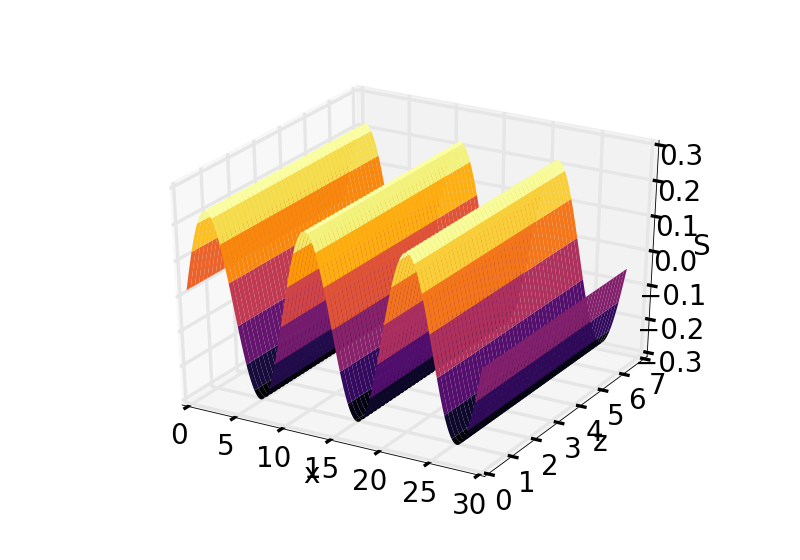

<IPython.core.display.Javascript object>


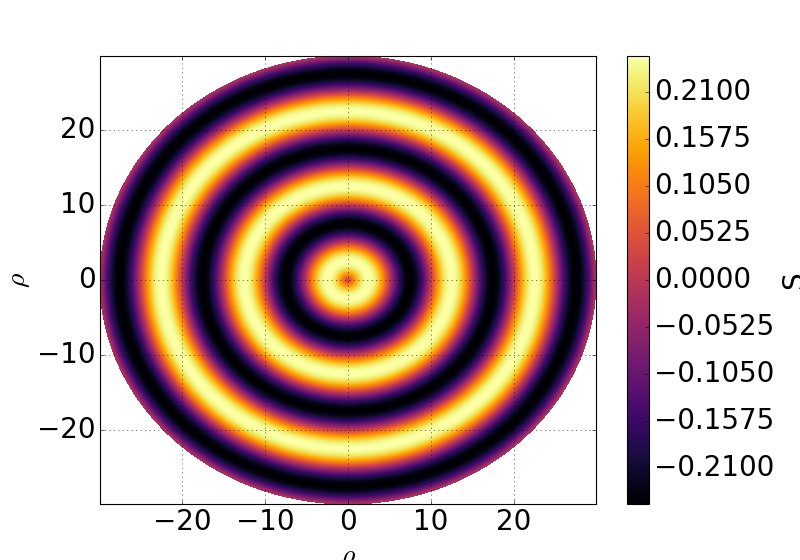

<IPython.core.display.Javascript object>


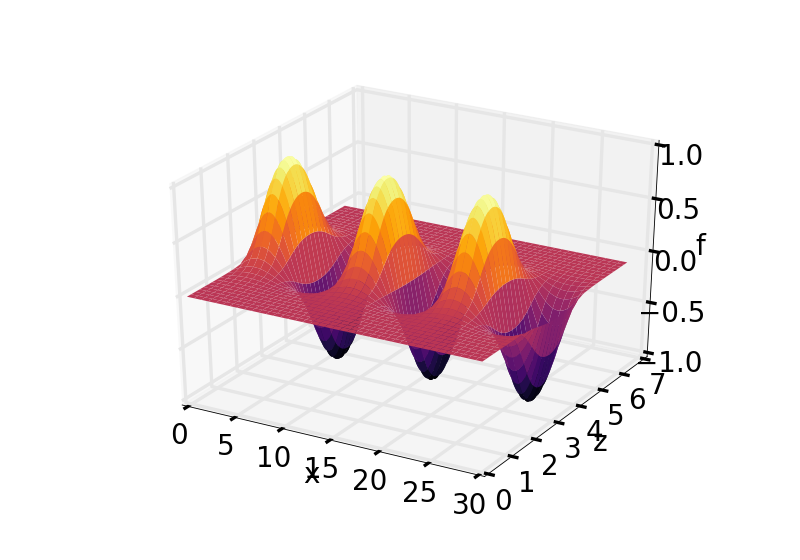

<IPython.core.display.Javascript object>


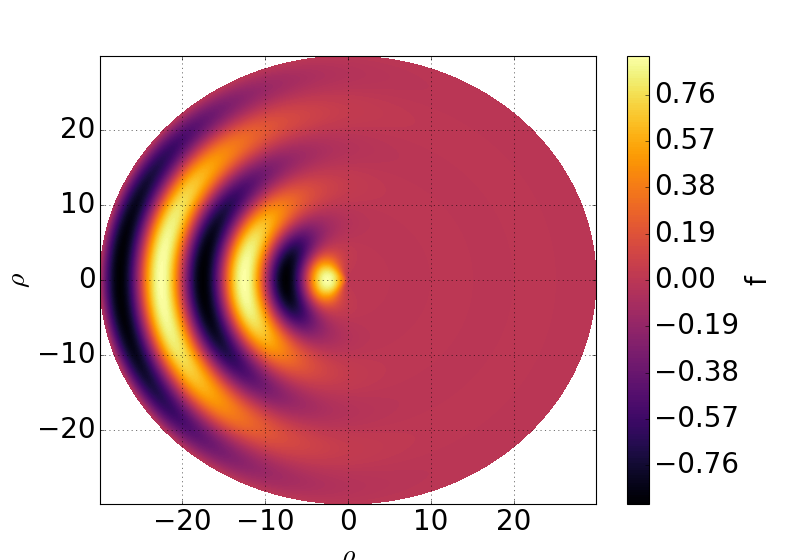

In [7]:
make_plot(folder=folder, the_vars=the_vars, plot2d=True, include_aux=False)

## Print the variables in BOUT++ format

In [8]:
BOUT_print(the_vars, rational=False)


[S]
0.249993590388005*sin(pi*geom:xl/5)

[f]
(-0.5*tanh(2*z - 5*pi/2) + 0.5*tanh(2*z - 3*pi/2))*sin(pi*geom:xl/5)
